# Image denoising 

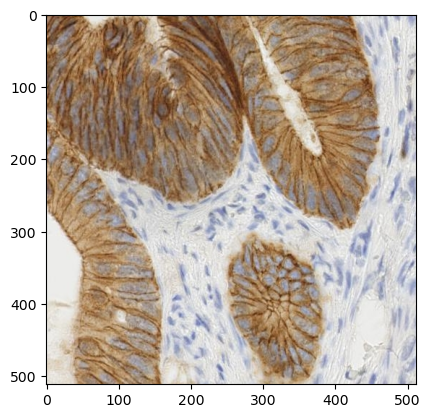

In [2]:
from skimage import data
import matplotlib.pyplot as plt
import numpy as np
immu = data.immunohistochemistry()
plt.imshow(immu)

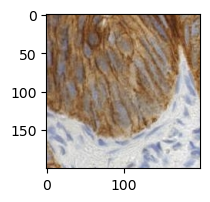

In [3]:
sub_immu = immu[100:300,100:300]
plt.figure(figsize =(2,2))
plt.imshow(sub_immu)

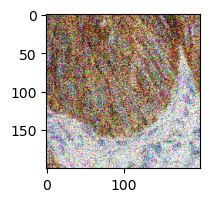

In [4]:
# generate noisy sub-image
from skimage import img_as_float
from skimage.util import random_noise
sigma = 0.25 # the higher the value the more corrupted
float_sub = img_as_float(sub_immu) # needs a conversion for the arrays to be stored as float
noisy_sub = random_noise(float_sub, var = sigma**2)
plt.figure(figsize=(2,2))
plt.imshow(noisy_sub)

In [5]:
# Denoising
from skimage.restoration import estimate_sigma

# Estimate the average noise standard deviation across color channels.
sigma_est = estimate_sigma(noisy_sub, channel_axis = -1, average_sigmas = True)

# Due to clipping in random_noise, the estimate will be a bit smaller than the
# specified sigma.
print(f'Estimated Gaussian noise standard deviation = {sigma_est}')


Estimated Gaussian noise standard deviation = 0.22564996149080607


C:\Users\a_j_p\anaconda3\lib\site-packages\skimage\_shared\utils.py:348: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  return func(*args, **kwargs)


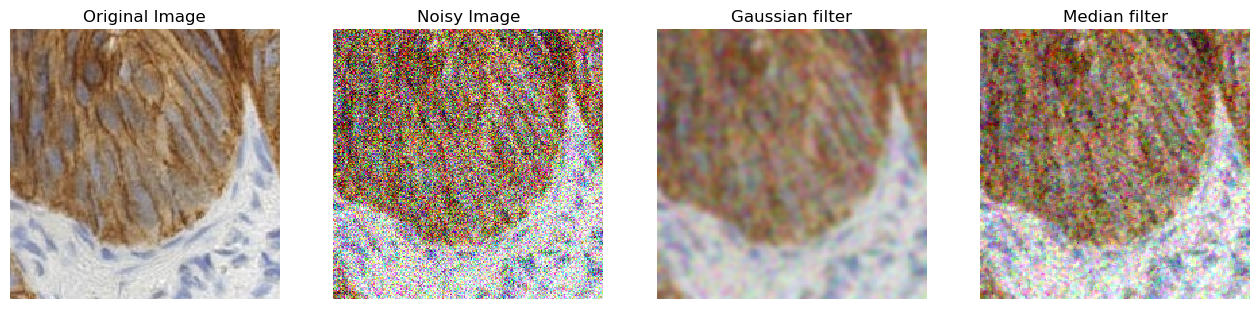

In [6]:
# Basic denosing 
from skimage import filters

gaussian_filter = filters.gaussian(noisy_sub, sigma = 2) # this is one of the denoisying algorithms
med_filter = filters.median(noisy_sub, np.ones((3,3,1))) # this is another denoisying algorithm 
# median filting - takes the median of the pixels around the corrupted pixels to get a good approximation of the correct pixel
# median filtering seems to be the best of the basic denoisysing algorithms

plt.figure(figsize=(16, 4))

plt.subplot(141)
plt.imshow(sub_immu, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.title('Original Image')

plt.subplot(142)
plt.imshow(noisy_sub, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.title('Noisy Image')

plt.subplot(143)
plt.imshow(gaussian_filter, cmap='gray',
           interpolation='nearest')
plt.axis('off')
plt.title('Gaussian filter')

plt.subplot(144)
plt.imshow(med_filter, cmap='gray',
           interpolation='nearest')
plt.axis('off')
plt.title('Median filter')

plt.show()

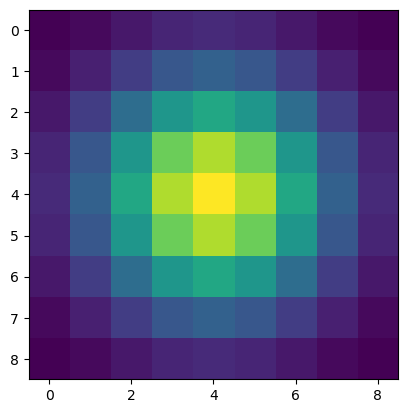

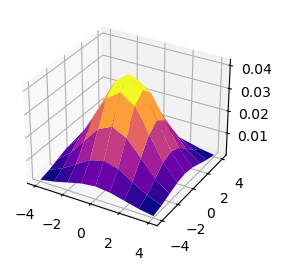

In [7]:
# A bit on Gaussian kernel 
import matplotlib.pyplot as plt
import numpy as np

def gaussian_kernel(size, sigma):
    """Returns a 2D Gaussian kernel with the given size and standard deviation."""
    x, y = np.meshgrid(np.arange(-size//2 + 1, size//2 + 1), np.arange(-size//2 + 1, size//2 + 1))
    kernel = np.exp(-(x**2 + y**2) / (2*sigma**2))
    return x, y, kernel / np.sum(kernel)

# Generate a 5x5 Gaussian kernel with sigma=1.5
x, y, kernel = gaussian_kernel(9, 2)
plt.imshow(kernel)
#3D plot using surface 
plt.figure(figsize = (3,3))
ax2 = plt.axes(projection='3d')
ax2.plot_surface(x,y,kernel,cmap ='plasma')


__Practice:__ Take a subimage of the camera dataset. Add noise to make a noisy image. Denoise the noisy image using Gaussian and median filters.

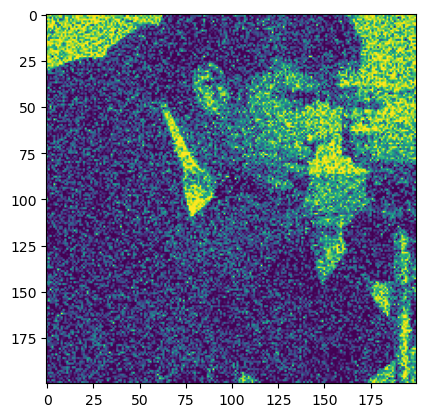

In [8]:
camera = data.camera()
sub_cam = camera[100:300,100:300]
noisy_cam = random_noise(img_as_float(sub_cam), var = sigma**2)
plt.imshow(noisy_cam)

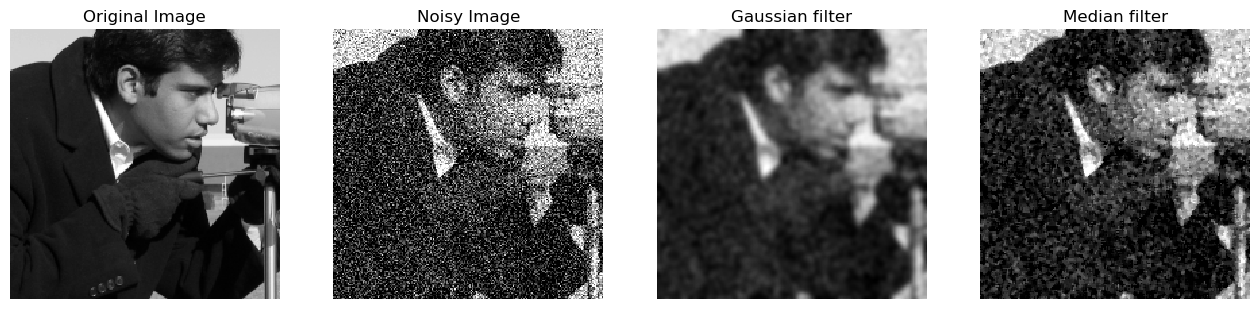

In [9]:
gaussian_filter = filters.gaussian(noisy_cam, sigma = 2) # this is one of the denoisying algorithms
med_filter = filters.median(noisy_cam, np.ones((3,3))) # this is another denoisying algorithm 

plt.figure(figsize=(16, 4))

plt.subplot(141)
plt.imshow(sub_cam, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.title('Original Image')

plt.subplot(142)
plt.imshow(noisy_cam, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.title('Noisy Image')

plt.subplot(143)
plt.imshow(gaussian_filter, cmap='gray',
           interpolation='nearest')
plt.axis('off')
plt.title('Gaussian filter')

plt.subplot(144)
plt.imshow(med_filter, cmap='gray',
           interpolation='nearest')
plt.axis('off')
plt.title('Median filter')

plt.show()

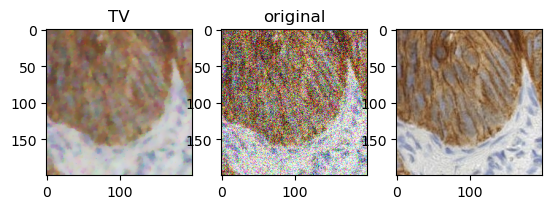

In [10]:
#Advanced denosing 

from skimage.restoration import denoise_tv_chambolle # tv = total variation; it is a advanced denoising technique
tv = denoise_tv_chambolle(noisy_sub, weight = 0.2, channel_axis = -1) 

plt.figure()

ax1 =  plt.subplot(1,3,1)
ax1.set_title('TV')
plt.imshow(tv)

ax2 = plt.subplot(1,3,2)
ax2.set_title('noisy_sub')
plt.imshow(noisy_sub)

ax3 = plt.subplot(1,3,3)
ax2.set_title('original')
plt.imshow(sub_immu)

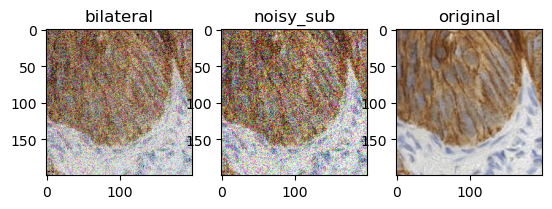

In [13]:
from skimage.restoration import denoise_bilateral
bilateral = denoise_bilateral(noisy_sub, sigma_color = 0.05, sigma_spatial = 15, channel_axis = -1)

plt.figure()

ax1 =  plt.subplot(1,3,1)
ax1.set_title('bilateral')
plt.imshow(bilateral)

ax2 = plt.subplot(1,3,2)
ax2.set_title('noisy_sub')
plt.imshow(noisy_sub)

ax3 = plt.subplot(1,3,3)
ax3.set_title('original')
plt.imshow(sub_immu)

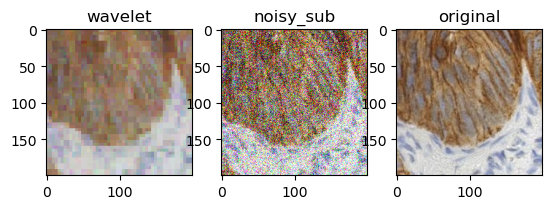

In [16]:
from skimage.restoration import denoise_wavelet

wavelet = denoise_wavelet(noisy_sub, channel_axis = -1, rescale_sigma = True) # causes the resolution to be lower - dispixelation or chess board effect 

plt.figure()
ax1 =  plt.subplot(1,3,1)
ax1.set_title('wavelet')
plt.imshow(wavelet)

ax2 = plt.subplot(1,3,2)
ax2.set_title('noisy_sub')
plt.imshow(noisy_sub)

ax3 = plt.subplot(1,3,3)
ax3.set_title('original')
plt.imshow(sub_immu)

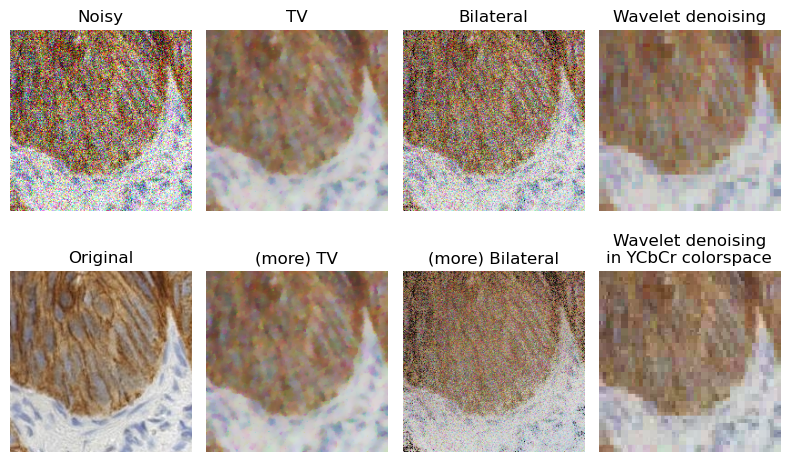

In [17]:
from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 denoise_wavelet)

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(8, 5),
                       sharex=True, sharey=True)

plt.gray()
ax[0, 0].imshow(noisy_sub)
ax[0, 0].axis('off')
ax[0, 0].set_title('Noisy')
ax[0, 1].imshow(tv)
ax[0, 1].axis('off')
ax[0, 1].set_title('TV')
ax[0, 2].imshow(bilateral)
ax[0, 2].axis('off')
ax[0, 2].set_title('Bilateral')
ax[0, 3].imshow(wavelet)
ax[0, 3].axis('off')
ax[0, 3].set_title('Wavelet denoising')

ax[1, 1].imshow(denoise_tv_chambolle(noisy_sub, weight=0.2, channel_axis=-1))
ax[1, 1].axis('off')
ax[1, 1].set_title('(more) TV')
ax[1, 2].imshow(denoise_bilateral(noisy_sub, sigma_color=0.1, sigma_spatial=15,
                channel_axis=-1))
ax[1, 2].axis('off')
ax[1, 2].set_title('(more) Bilateral')
ax[1, 3].imshow(denoise_wavelet(noisy_sub, channel_axis=-1, convert2ycbcr=True,
                                rescale_sigma=True))
ax[1, 3].axis('off')
ax[1, 3].set_title('Wavelet denoising\nin YCbCr colorspace')
ax[1, 0].imshow(sub_immu)
ax[1, 0].axis('off')
ax[1, 0].set_title('Original')

fig.tight_layout()

plt.show()

__Practice:__ Take a subimage of the shepp_logan_phantom dataset. Add noise to make a noisy image. Denoise the noisy image using TV, bilateral, and wavelet denoising method.

In [ ]:
# Prof. says to denoise it just using tv